In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from scipy import stats

!pip install rapidfuzz
from rapidfuzz import process, fuzz


In [ ]:
df = pd.read_csv('/content/sample_data/Accidental_Drug_Related_Deaths.csv')

In [ ]:
#Setup for the viewing tables
desired_width = 15000
pd.set_option('display.width', desired_width)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
np.set_printoptions(linewidth=desired_width)

# Data Exploration

## Sample of data

In [ ]:
df.head(20)

,Date,Date Type,Age,Sex,Race,Ethnicity,Residence City,Residence County,Residence State,Injury City,Injury County,Injury State,Injury Place,Description of Injury,Death City,Death County,Death State,Location,Location if Other,Cause of Death,Manner of Death,Other Significant Conditions,Heroin,Heroin death certificate (DC),Cocaine,Fentanyl,Fentanyl Analogue,Oxycodone,Oxymorphone,Ethanol,Hydrocodone,Benzodiazepine,Methadone,Meth/Amphetamine,Amphet,Tramad,Hydromorphone,Morphine (Not Heroin),Xylazine,Gabapentin,Opiate NOS,Heroin/Morph/Codeine,Other Opioid,Any Opioid,Other,ResidenceCityGeo,InjuryCityGeo,DeathCityGeo
0,05/29/2012,Date of death,37.0,Male,Black,NaN,STAMFORD,FAIRFIELD,NaN,STAMFORD,NaN,CT,Residence,Used Cocaine,NaN,NaN,NaN,Residence,NaN,Cocaine Toxicity,Accident,NaN,NaN,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"STAMFORD, CT\n(41.051924, -73.539475)","STAMFORD, CT\n(41.051924, -73.539475)","CT\n(41.575155, -72.738288)"
1,06/27/2012,Date of death,37.0,Male,White,NaN,NORWICH,NEW LONDON,NaN,NORWICH,NaN,CT,Residence,Drug Use,NORWICH,NEW LONDON,NaN,Hospital,NaN,Heroin Toxicity,Accident,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"NORWICH, CT\n(41.524304, -72.075821)","NORWICH, CT\n(41.524304, -72.075821)","Norwich, CT\n(41.524304, -72.075821)"
2,03/24/2014,Date of death,28.0,Male,White,NaN,HEBRON,NaN,NaN,HEBRON,NaN,CT,Residence,Drug Use,MARLBOROUGH,NaN,NaN,Hospital,NaN,Heroin Intoxication,Accident,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"HEBRON, CT\n(41.658069, -72.366324)","HEBRON, CT\n(41.658069, -72.366324)","Marlborough, CT\n(41.632043, -72.461309)"
3,12/31/2014,Date of death,26.0,Female,White,NaN,BALTIC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BALTIC,NEW LONDON,NaN,Residence,NaN,Acute Heroin Intoxication,Accident,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"BALTIC, CT\n(41.617221, -72.085031)","CT\n(41.575155, -72.738288)","Baltic, CT\n(41.617221, -72.085031)"
4,01/16/2016,Date of death,41.0,Male,White,NaN,SHELTON,FAIRFIELD,CT,SHELTON,NaN,NaN,Residence,Drug Use,BRIDGEPORT,NaN,NaN,Hospital,NaN,Acute Fentanyl Intoxication,Accident,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,"SHELTON, CT\n(41.316843, -73.092968)","SHELTON, CT\n(41.316843, -73.092968)","Bridgeport, CT\n(41.179195, -73.189476)"
5,06/13/2017,Date reported,57.0,Male,White,NaN,BLANDFORD,HAMPDEN,MA,ENFIELD,HARTFORD,CT,In Vehicle,Drug abuse,ENFIELD,HARTFORD,CT,Other,Roadway in vehicle,Acute Intoxication Cocaine Toxicity,Accident,NaN,NaN,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"ENFIELD, CT\n(41.976501, -72.591985)","Enfield, CT\n(41.976501, -72.591985)"
6,10/20/2015,Date reported,26.0,Male,White,NaN,DANBURY,FAIRFIELD,CT,DANBURY,NaN,NaN,Residence,NaN,DANBURY,FAIRFIELD,CT,Hospital,NaN,Acute Opioid Intoxication,Accident,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,"DANBURY, CT\n(41.393666, -73.451539)","DANBURY, CT\n(41.393666, -73.451539)","Danbury, CT\n(41.393666, -73.451539)"
7,02/02/2017,Date reported,64.0,Male,White,NaN,MILFORD,NEW HAVEN,CT,MILFORD,NEW HAVEN,CT,Residence,Ingestion,MILFORD,NEW HAVEN,CT,Residence,NaN,Acute Oxycodone Intoxication,Accident,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"MILFORD, CT\n(41.224276, -73.057564)","MILFORD, CT\n(41.224276, -73.057564)","Milford, CT\n(41.224276, -73.057564)"
8,07/03/2018,Date of death,33.0,Male,NaN,NaN,NaN,NaN,NaN,HARTFORD,HARTFORD,NaN,Building,Drug Use,HARTFORD,HARTFORD,CT,Other,NaN,Acute Cocaine Intoxication,Accident,NaN,NaN,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"CT\n(41.575155, -72.738288)","HARTFORD, CT\n(41.765775, -72.673356)","Hartford, CT\n(41.765775, -72.673356)"
9,05/08/2013,Date o

In [ ]:
## Data information

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11981 entries, 0 to 11980
Data columns (total 48 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Date                           11981 non-null  object 
 1   Date Type                      11981 non-null  object 
 2   Age                            11979 non-null  float64
 3   Sex                            11972 non-null  object 
 4   Race                           11924 non-null  object 
 5   Ethnicity                      2565 non-null   object 
 6   Residence City                 11385 non-null  object 
 7   Residence County               10721 non-null  object 
 8   Residence State                9993 non-null   object 
 9   Injury City                    11803 non-null  object 
 10  Injury County                  8647 non-null   object 
 11  Injury State                   8952 non-null   object 
 12  Injury Place                   11623 non-null 

## Summary Statistics of data

In [ ]:
df.describe().round(2)

,Age
count,11979.00
mean,44.01
std,12.68
min,13.00
25%,34.00
50%,44.00
75%,54.00
max,87.00


In [ ]:
#Get categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns
df[categorical_columns].describe()

,Date,Date Type,Sex,Race,Ethnicity,Residence City,Residence County,Residence State,Injury City,Injury County,Injury State,Injury Place,Description of Injury,Death City,Death County,Death State,Location,Location if Other,Cause of Death,Manner of Death,Other Significant Conditions,Heroin,Heroin death certificate (DC),Cocaine,Fentanyl,Fentanyl Analogue,Oxycodone,Oxymorphone,Ethanol,Hydrocodone,Benzodiazepine,Methadone,Meth/Amphetamine,Amphet,Tramad,Hydromorphone,Morphine (Not Heroin),Xylazine,Gabapentin,Opiate NOS,Heroin/Morph/Codeine,Other Opioid,Any Opioid,Other,ResidenceCityGeo,InjuryCityGeo,DeathCityGeo
count,11981,11981,11972,11924,2565,11385,10721,9993,11803,8647,8952,11623,11174,9197,8090,6873,10632,1194,11981,11972,1199,3578,740,4578,8049,974,1016,162,3201,169,2717,1078,127,431,302,77,59,1078,469,127,2202,222,8947,786,11814,11724,11980
unique,3877,2,4,22,13,536,163,35,297,18,7,99,539,238,10,2,16,543,7632,6,390,1,1,1,3,1,1,1,2,1,1,1,1,1,1,1,4,1,2,1,2,18,2,153,633,493,240
top,05/27/2021,Date of death,Male,White,Hispanic,HARTFORD,NEW HAVEN,CT,HARTFORD,NEW HAVEN,CT,Residence,Substance Abuse,HARTFORD,HARTFORD,CT,Residence,Friend's Residence,Acute Fentanyl Intoxication,Accident,Recent Cocaine Use,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,PCP,"HARTFORD, CT\n(41.765775, -72.673356)","HARTFORD, CT\n(41.765775, -72.673356)","CT\n(41.57350273000003, -72.73830590799997)"
freq,12,10214,8887,10080,972,830,3145,9661,1099,2716,8912,6188,3233,1083,2441,6872,4799,68,556,11942,199,3578,740,4578,8047,974,1016,162,3200,169,2717,1078,127,431,302,77,56,1078,468,127,2157,90,8828,165,705,934,1452


## Shape of data

In [ ]:
df.shape

(11981, 48)

# Data preprocessing

## No white space

In [ ]:
df.rename(columns=lambda x: x.strip(), inplace=True)

## Change data type

In [ ]:
df["Date"] = pd.to_datetime(df["Date"])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11981 entries, 0 to 11980
Data columns (total 48 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Date                           11981 non-null  datetime64[ns]
 1   Date Type                      11981 non-null  object        
 2   Age                            11979 non-null  float64       
 3   Sex                            11972 non-null  object        
 4   Race                           11924 non-null  object        
 5   Ethnicity                      2565 non-null   object        
 6   Residence City                 11385 non-null  object        
 7   Residence County               10721 non-null  object        
 8   Residence State                9993 non-null   object        
 9   Injury City                    11803 non-null  object        
 10  Injury Country                 8647 non-null   object        
 11  Injury State   

## Impute unknown values

In [ ]:
unknown_counts = df.eq("Unknown").sum()

print("\nNumber of 'Unknown' in Each Column:")
print(unknown_counts)


Number of 'Unknown' in Each Column:
Date                               0
Date Type                          0
Age                                0
Sex                                2
Race                              62
Ethnicity                         17
Residence City                     0
Residence County                   0
Residence State                    0
Injury City                        0
Injury Country                     0
Injury State                       0
Injury Place                     308
Description of Injury              5
Death City                         0
Death County                       0
Death State                        0
Location                           0
Location if Other                  1
Cause of Death                     0
Manner of Death                    0
Other Significant Conditions       0
Heroin                             0
Heroin death certificate (DC)      0
Cocaine                            0
Fentanyl                           0
F

In [ ]:
UNKNOWN_counts = df.eq("UNKNOWN").sum()

print("\nNumber of 'UNKNOWN' in Each Column:")
print(UNKNOWN_counts)


Number of 'UNKNOWN' in Each Column:
Date                               0
Date Type                          0
Age                                0
Sex                                0
Race                               0
Ethnicity                          0
Residence City                     8
Residence County                   0
Residence State                    0
Injury City                      221
Injury Country                    11
Injury State                       5
Injury Place                       0
Description of Injury              0
Death City                         0
Death County                       0
Death State                        0
Location                           0
Location if Other                  0
Cause of Death                     0
Manner of Death                    0
Other Significant Conditions       0
Heroin                             0
Heroin death certificate (DC)      0
Cocaine                            0
Fentanyl                           0
F

In [ ]:
OtherUnk_counts = df.eq("Other (unknown)").sum()

print("\nNumber of 'Other (unknown)' in Each Column:")
print(OtherUnk_counts)


Number of 'Other (unknown)' in Each Column:
Date                              0
Date Type                         0
Age                               0
Sex                               0
Race                              0
Ethnicity                         0
Residence City                    0
Residence County                  0
Residence State                   0
Injury City                       0
Injury Country                    0
Injury State                      0
Injury Place                     13
Description of Injury             0
Death City                        0
Death County                      0
Death State                       0
Location                          0
Location if Other                 0
Cause of Death                    0
Manner of Death                   0
Other Significant Conditions      0
Heroin                            0
Heroin death certificate (DC)     0
Cocaine                           0
Fentanyl                          0
Fentanyl Analogue  

In [ ]:
df[["Sex","Race", "Ethnicity", "Injury City","Injury Country", "Injury Place","Injury State", "Description of Injury", "Location if Other" ]]= df[["Sex",
  "Race", "Ethnicity", "Injury City","Injury Country", "Injury Place","Injury State", "Description of Injury", "Location if Other" ]].apply(
    lambda col: col.replace(["Unknown", "UNKNOWN", "Other (unknown)","X"], col.mode()[0]))

In [ ]:
unknown_counts = df.eq("Unknown").sum()

print("\nNumber of 'Unknown' in Each Column:")
print(unknown_counts)


Number of 'Unknown' in Each Column:
Date                             0
Date Type                        0
Age                              0
Sex                              0
Race                             0
Ethnicity                        0
Residence City                   0
Residence County                 0
Residence State                  0
Injury City                      0
Injury Country                   0
Injury State                     0
Injury Place                     0
Description of Injury            0
Death City                       0
Death County                     0
Death State                      0
Location                         0
Location if Other                0
Cause of Death                   0
Manner of Death                  0
Other Significant Conditions     0
Heroin                           0
Heroin death certificate (DC)    0
Cocaine                          0
Fentanyl                         0
Fentanyl Analogue                0
Oxycodone         

In [ ]:
UNKNOWN_counts = df.eq("UNKNOWN").sum()

print("\nNumber of 'UNKNOWN' in Each Column:")
print(UNKNOWN_counts)


Number of 'UNKNOWN' in Each Column:
Date                             0
Date Type                        0
Age                              0
Sex                              0
Race                             0
Ethnicity                        0
Residence City                   8
Residence County                 0
Residence State                  0
Injury City                      0
Injury Country                   0
Injury State                     0
Injury Place                     0
Description of Injury            0
Death City                       0
Death County                     0
Death State                      0
Location                         0
Location if Other                0
Cause of Death                   0
Manner of Death                  0
Other Significant Conditions     0
Heroin                           0
Heroin death certificate (DC)    0
Cocaine                          0
Fentanyl                         0
Fentanyl Analogue                0
Oxycodone         

In [ ]:
OtherUnk_counts = df.eq("Other (unknown)").sum()

print("\nNumber of 'Other (unknown)' in Each Column:")
print(OtherUnk_counts)


Number of 'Other (unknown)' in Each Column:
Date                             0
Date Type                        0
Age                              0
Sex                              0
Race                             0
Ethnicity                        0
Residence City                   0
Residence County                 0
Residence State                  0
Injury City                      0
Injury Country                   0
Injury State                     0
Injury Place                     0
Description of Injury            0
Death City                       0
Death County                     0
Death State                      0
Location                         0
Location if Other                0
Cause of Death                   0
Manner of Death                  0
Other Significant Conditions     0
Heroin                           0
Heroin death certificate (DC)    0
Cocaine                          0
Fentanyl                         0
Fentanyl Analogue                0
Oxycodone 

## Merge Similar Column


In [ ]:
df["Location"] = df["Location"].replace("Other (Specify)", "Other")

# Define a function to apply if-else logic
def replace_other(row):
    if row['Location'] == 'Other':
        return row['Location if Other']
    else:
        return row['Location']

# Apply the function to Location
df['Location'] = df.apply(replace_other, axis=1)

df = df.drop('Location if Other', axis=1)

## Missing Value

In [ ]:
print("Missing Values:\n",df.isnull().sum())

Missing Values:
 Date                                 0
Date Type                            0
Age                                  2
Sex                                  9
Race                                57
Ethnicity                         9416
Residence City                     596
Residence County                  1260
Residence State                   1988
Injury City                        178
Injury Country                    3334
Injury State                      3029
Injury Place                       358
Description of Injury              807
Death City                        2784
Death County                      3891
Death State                       5108
Location                          2142
Cause of Death                       0
Manner of Death                      9
Other Significant Conditions     10782
Heroin                            8403
Heroin death certificate (DC)    11241
Cocaine                           7403
Fentanyl                          3932
Fentanyl

In [ ]:
df = df.drop(['Ethnicity', 'Other Significant Conditions','Other'], axis=1)

In [ ]:
df[["Heroin", "Heroin death certificate (DC)", "Cocaine", "Fentanyl", "Fentanyl Analogue", "Oxycodone", "Oxymorphone",
    "Ethanol", "Hydrocodone", "Benzodiazepine", "Methadone", "Meth/Amphetamine", "Amphet", "Tramad", "Hydromorphone",
    "Morphine (Not Heroin)", "Xylazine", "Gabapentin", "Opiate NOS", "Heroin/Morph/Codeine", "Other Opioid", "Any Opioid"]] = \
    df[["Heroin", "Heroin death certificate (DC)", "Cocaine", "Fentanyl", "Fentanyl Analogue", "Oxycodone", "Oxymorphone",
        "Ethanol", "Hydrocodone", "Benzodiazepine", "Methadone", "Meth/Amphetamine", "Amphet", "Tramad", "Hydromorphone",
        "Morphine (Not Heroin)", "Xylazine", "Gabapentin", "Opiate NOS", "Heroin/Morph/Codeine", "Other Opioid", "Any Opioid"]] \
    .fillna("No") \
    .replace({"Y": "Yes", "y": "Yes", "N": "No", "P" :"Yes", "PCP NEG": "Yes" ,"Y (POPS)": "Yes", "Y (PITCH)": "Yes"})

In [ ]:
float_cols = df.select_dtypes(include=['float64']).columns
object_cols = df.select_dtypes(include=['object']).columns

df[float_cols]  = df[float_cols].apply(lambda col: col.fillna(col.mean()))
df[object_cols]  = df[object_cols].apply(lambda col: col.fillna(col.mode()[0]))

In [ ]:
print("Missing Values after handeling :\n",df.isnull().sum())

Missing Values after handeling :
 Date                             0
Date Type                        0
Age                              0
Sex                              0
Race                             0
Residence City                   0
Residence County                 0
Residence State                  0
Injury City                      0
Injury Country                   0
Injury State                     0
Injury Place                     0
Description of Injury            0
Death City                       0
Death County                     0
Death State                      0
Location                         0
Cause of Death                   0
Manner of Death                  0
Heroin                           0
Heroin death certificate (DC)    0
Cocaine                          0
Fentanyl                         0
Fentanyl Analogue                0
Oxycodone                        0
Oxymorphone                      0
Ethanol                          0
Hydrocodone          

## Group Similar Categories

In [ ]:
print(df["Location"].value_counts())

Location
Residence                                6948
Hospital                                 2336
Decedent’s Home                           776
Hospital - ER/Outpatient                  401
Hospital - Inpatient                      246
Hospital - Dead On Arrival                 81
Friend's Residence                         65
Decedent's Home                            54
Hotel                                      42
Friend's House                             40
Friend's Home                              35
In Vehicle                                 28
Hotel/Motel                                25
Friend's residence                         22
Motel                                      18
Apartment                                  16
Parking Lot                                16
Friend's house                             14
Other's Residence                          14
House                                      13
Friends House                              12
Motel 6                  

In [ ]:
df['Location'] = df['Location'].replace({
    'Decedentâ€™s Home': 'Decedents Home',
    'Hospital - Inpatient': 'Hospital',
    'Hospital - Dead On Arrival': 'Hospital',
    'Hospital - ER/Outpatient': 'Hospital',
})

## Handling minor spelling and capital error

In [ ]:
def correct_column(series, score_cutoff=80):
    # Normalize text: lowercase and strip whitespace
    normalized = series.str.lower().str.strip()
    unique_vals = normalized.unique().tolist()

    # Cache corrections for unique values to avoid redundant computations
    correction_cache = {}

    def match_value(x):
        if x in correction_cache:
            return correction_cache[x]
        # Use RapidFuzz to find the best match among the unique values
        match = process.extractOne(x, unique_vals, scorer=fuzz.ratio, score_cutoff=score_cutoff)
        corrected = match[0] if match else x
        correction_cache[x] = corrected
        return corrected

    return normalized.apply(match_value)

In [ ]:
df['Description of Injury'] = correct_column(df['Description of Injury'])
df['Cause of Death'] = correct_column(df['Cause of Death'])
df['Manner of Death'] = correct_column(df['Manner of Death'])

In [ ]:
df['Manner of Death'] = df['Manner of Death'].replace({
    'acciddent': 'accident',
})

In [ ]:
SpError_columns = ["Description of Injury", "Cause of Death", "Manner of Death"]

In [ ]:
for col in SpError_columns:
    # Calculate the threshold for the current column
    threshold = 0.015 * df[col].count()
    # Precompute the value counts for the current column
    counts = df[col].value_counts()
    # Replace values with "Other" if their count is below the threshold
    df[col] = df[col].apply(lambda x: x if counts.get(x, 0) >= threshold else "Other")
    # Display updated value counts for the column
    print("Value counts for {col}:\n\n", df[col].value_counts(), "\n")


Value counts for {col}:

 Description of Injury
substance abuse    5641
substance use      2052
Other              1726
drug use           1396
drug abuse          595
ingestion           384
used drugs          187
Name: count, dtype: int64 

Value counts for {col}:

 Cause of Death
Other                          11346
acute fentanyl intoxication      635
Name: count, dtype: int64 

Value counts for {col}:

 Manner of Death
accident    11966
Other          15
Name: count, dtype: int64 



In [ ]:
print(df["Race"].value_counts())

Race
White                                                       10199
Black or African American                                     826
Black                                                         809
Other                                                          52
Asian Indian                                                   26
Asian, Other                                                   24
Other (Specify)                                                13
Other Asian                                                    12
Asian/Indian                                                    5
Asian                                                           2
white                                                           2
Chinese                                                         2
Other Asian (Specify)                                           1
Korean                                                          1
Native American, Other                                          1
Hawai

## Group Minority Data

In [ ]:
top_3_categories = df["Race"].value_counts().nlargest(3).index

# Replace other categories with "Other"
df["Race"] = df["Race"].where(df["Race"].isin(top_3_categories), "Other")

print(df["Race"].value_counts())

Race
White                        10199
Black or African American      826
Black                          809
Other                          147
Name: count, dtype: int64


In [ ]:
S_columns = ["Residence City",
       "Residence County", "Residence State", "Injury City", "Injury Country",
       "Injury State", "Injury Place", "Death City",
       "Death County", "Death State","Location", "Other Opioid"]

In [ ]:
for col in S_columns:
    # Calculate the threshold for the current column
    threshold = 0.02 * df[col].count()
    # Precompute the value counts for the current column
    counts = df[col].value_counts()
    # Replace values with "Other" if their count is below the threshold
    df[col] = df[col].apply(lambda x: x if counts.get(x, 0) >= threshold else "Other")
    # Display updated value counts for the column
    print("Value counts for {col}:", df[col].value_counts(), "\n")


Value counts for {col}: Residence City
Other          7230
HARTFORD       1426
NEW HAVEN       731
WATERBURY       720
BRIDGEPORT      636
NEW BRITAIN     420
BRISTOL         303
MERIDEN         275
NORWICH         240
Name: count, dtype: int64 

Value counts for {col}: Residence County
NEW HAVEN     4405
HARTFORD      2893
FAIRFIELD     1720
NEW LONDON     945
LITCHFIELD     575
MIDDLESEX      435
WINDHAM        370
Other          347
TOLLAND        291
Name: count, dtype: int64 

Value counts for {col}: Residence State
CT       11649
Other      332
Name: count, dtype: int64 

Value counts for {col}: Injury City
Other          6823
HARTFORD       1498
NEW HAVEN       861
WATERBURY       840
BRIDGEPORT      700
NEW BRITAIN     418
BRISTOL         306
MERIDEN         289
NORWICH         246
Name: count, dtype: int64 

Value counts for {col}: Injury Country
NEW HAVEN     6061
HARTFORD      2515
FAIRFIELD     1381
NEW LONDON     751
LITCHFIELD     423
MIDDLESEX      323
WINDHAM        305

## Extract Geographical data

In [ ]:
# Define the regex pattern
pattern = r'^(.*),\s*([A-Z]{2})\s+\(([-\d.]+),\s*([-\d.]+)\)$'

# Extract data from the specific "address" column into new columns
df[['city', 'state', 'RCG_latitude', 'RCG_longitude']] = df['ResidenceCityGeo'].str.extract(pattern)

# Convert latitude and longitude to numeric values
df['RCG_latitude'] = pd.to_numeric(df['RCG_latitude'])
df['RCG_longitude'] = pd.to_numeric(df['RCG_longitude'])

# Extract data from the specific "address" column into new columns
df[['city', 'state', 'ICG_latitude', 'ICG_longitude']] = df['InjuryCityGeo'].str.extract(pattern)

df['ICG_latitude'] = pd.to_numeric(df['ICG_latitude'])
df['ICG_longitude'] = pd.to_numeric(df['ICG_longitude'])

df[['city', 'state', 'DCG_latitude', 'DCG_longitude']] = df['DeathCityGeo'].str.extract(pattern)

df['DCG_latitude'] = pd.to_numeric(df['DCG_latitude'])
df['DCG_longitude'] = pd.to_numeric(df['DCG_longitude'])

df = df.drop(['city', 'state','ResidenceCityGeo','InjuryCityGeo','DeathCityGeo'], axis=1)

## Duplicate Rows

In [ ]:
duplicates = df.duplicated().sum()
print("Duplicate rows:", duplicates)


Duplicate rows: 0


## Handle Outlier

In [ ]:
z_scores = np.abs(stats.zscore(df['Age']))
threshold = 3

outliers = df[z_scores > threshold]
print("Outliers detected:")
print(outliers)


Outliers detected:
           Date      Date Type   Age   Sex   Race Residence City Residence County Residence State Injury City Injury Country Injury State Injury Place Description of Injury  Death City Death County Death State   Location Cause of Death Manner of Death Heroin Heroin death certificate (DC) Cocaine Fentanyl Fentanyl Analogue Oxycodone Oxymorphone Ethanol Hydrocodone Benzodiazepine Methadone Meth/Amphetamine Amphet Tramad Hydromorphone Morphine (Not Heroin) Xylazine Gabapentin Opiate NOS Heroin/Morph/Codeine Other Opioid Any Opioid  RCG_latitude  RCG_longitude  ICG_latitude  ICG_longitude  DCG_latitude  DCG_longitude
3506 2018-05-04  Date of death  84.0  Male  White     BRIDGEPORT        FAIRFIELD              CT  BRIDGEPORT      FAIRFIELD           CT    Residence              drug use  BRIDGEPORT    FAIRFIELD          CT   Hospital          Other        accident    Yes                            No      No      Yes                No        No          No      No       

In [ ]:
df = df[z_scores <= threshold]

## Label Encoding





In [ ]:
df_corr = df[['Age', 'Sex', 'Race']].copy()

le = LabelEncoder()

for col in df_corr.columns:
    if df_corr[col].dtype == 'object' or str(df_corr[col].dtype) == 'category':
        df_corr[col] = le.fit_transform(df_corr[col])

## Trim White spaces

In [ ]:
df.rename(columns=lambda x: x.replace(' ', '_'), inplace=True)

df.replace(to_replace={'Title':r'\s+'},value='_', regex=True, inplace=True)

<ipython-input-85-19fe784618ca>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns=lambda x: x.replace(' ', '_'), inplace=True)


# Data Visualization

## Boxplot for identifying outlier of Age


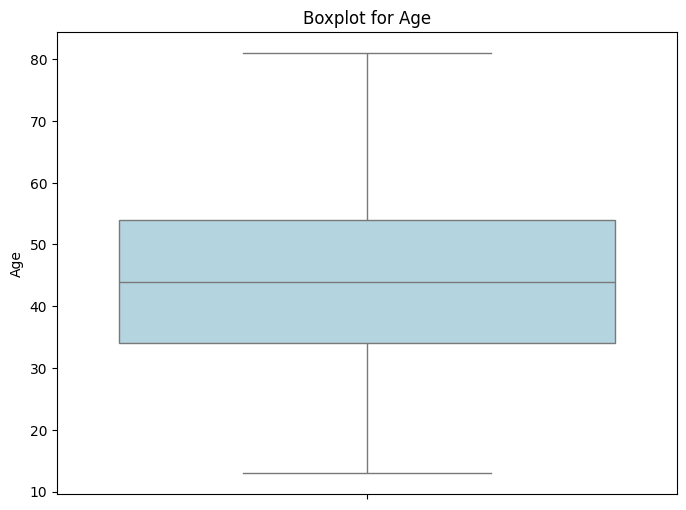

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(y='Age', data=df, color='lightblue')
plt.title('Boxplot for Age')
plt.ylabel('Age')
plt.show()

## Bar plot to visualize Frequency of Deaths By Gender

In [ ]:
gender_df = df.groupby('Sex').size().reset_index(name='Count')
gender_df

,Sex,Count
0,Female,3082
1,Male,8897


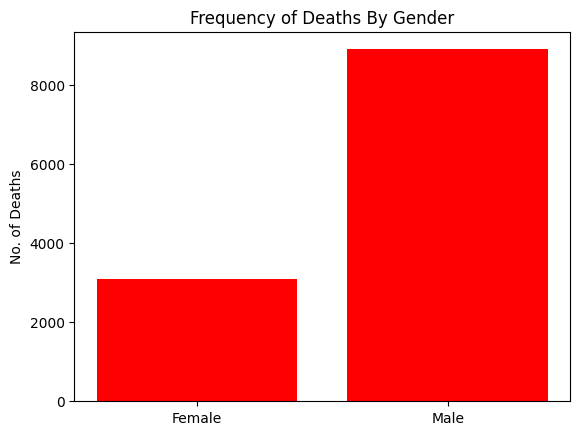

In [ ]:
plt.bar(gender_df['Sex'],gender_df['Count'],color='red')
plt.ylabel('No. of Deaths')
plt.title('Frequency of Deaths By Gender')
plt.show()

## Barplot for visualize the frequency of deaths by Race




In [ ]:
Race_df = df.groupby('Race').size().reset_index(name='Count')
Race_df

,Race,Count
0,Black,809
1,Black or African American,826
2,Other,147
3,White,10197


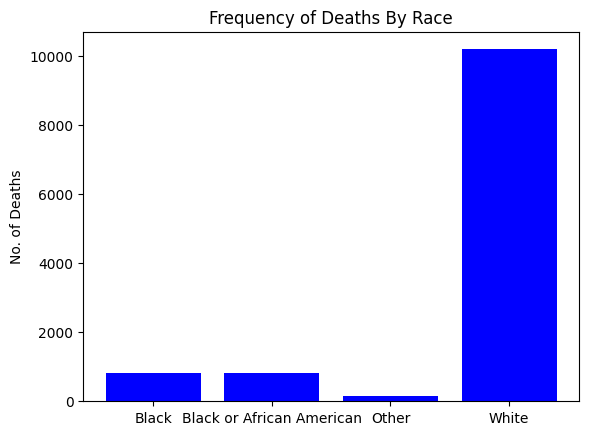

In [ ]:
plt.bar(Race_df['Race'],Race_df['Count'],color='blue')
plt.ylabel('No. of Deaths')
plt.title('Frequency of Deaths By Race')
plt.show()

## Histogram to visualize the frequency of deaths by age


In [ ]:
age_df = df.groupby('Age').size().reset_index(name='Count')
age_df

,Age,Count
0,13.000000,1
1,14.000000,2
2,15.000000,2
3,16.000000,4
4,17.000000,14
5,18.000000,24
6,19.000000,37
7,20.000000,63
8,21.000000,107
9,22.000000,117


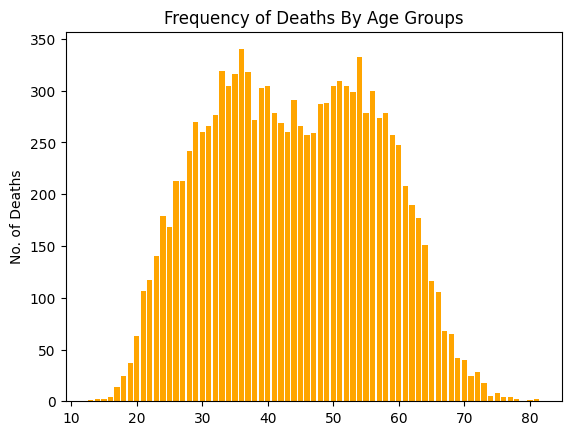

In [ ]:
plt.bar(age_df['Age'],age_df['Count'],color='orange')
plt.ylabel('No. of Deaths')
plt.title('Frequency of Deaths By Age Groups')
plt.show()

## Horizontal Bar Chart for visualize accidental death by location

In [ ]:
loc_df = df.groupby('Location').size().reset_index(name='Death Count')
loc_df

,Location,Death Count
0,Decedent’s Home,776
1,Hospital,3063
2,Other,1193
3,Residence,6947


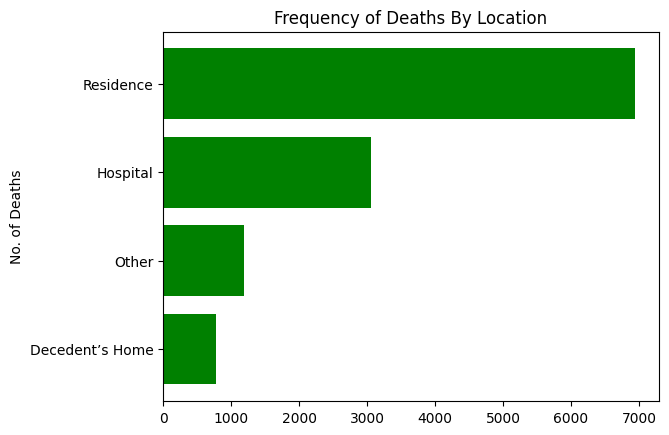

In [ ]:
loc_df = loc_df.sort_values(by=['Death Count'], ascending=True)

plt.barh(loc_df['Location'],loc_df['Death Count'],color='green')
plt.ylabel('No. of Deaths')
plt.title('Frequency of Deaths By Location')
plt.show()

## Bar plot to visualize the frequency of accidental deaths by drugs

In [ ]:
def count_occurrences(df, column_name):
    return (df[column_name] == 'Yes').sum()

drug_names = [
    'Heroin',
    'Cocaine',
    'Fentanyl',
    'Fentanyl_Analogue',
    'Oxycodone',
    'Oxymorphone',
    'Ethanol',
    'Hydrocodone',
    'Benzodiazepine',
    'Methadone',
    'Meth/Amphetamine',
    'Amphet',
    'Tramad',
    'Hydromorphone',
    'Morphine_(Not_Heroin)',
    'Xylazine',
    'Gabapentin',
    'Opiate_NOS',
    'Heroin/Morph/Codeine',
    'Other_Opioid',
    'Any_Opioid',
]

drug_counts = {}

for drug in drug_names:
    count = count_occurrences(df, drug)
    drug_counts[drug] = count

for drug, count in drug_counts.items():
    print(f"{drug} deaths: {count}")

Heroin deaths: 3577
Cocaine deaths: 4578
Fentanyl deaths: 8046
Fentanyl_Analogue deaths: 974
Oxycodone deaths: 1015
Oxymorphone deaths: 162
Ethanol deaths: 3201
Hydrocodone deaths: 169
Benzodiazepine deaths: 2717
Methadone deaths: 1078
Meth/Amphetamine deaths: 127
Amphet deaths: 431
Tramad deaths: 302
Hydromorphone deaths: 77
Morphine_(Not_Heroin) deaths: 57
Xylazine deaths: 1078
Gabapentin deaths: 469
Opiate_NOS deaths: 127
Heroin/Morph/Codeine deaths: 2201
Other_Opioid deaths: 0
Any_Opioid deaths: 8827


<ipython-input-96-987cc74710f0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=ax, x=list(drug_counts.keys()), y=list(drug_counts.values()), palette='viridis')
<ipython-input-96-987cc74710f0>:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


Text(0.5, 1.0, 'Accidental Drug Deaths')

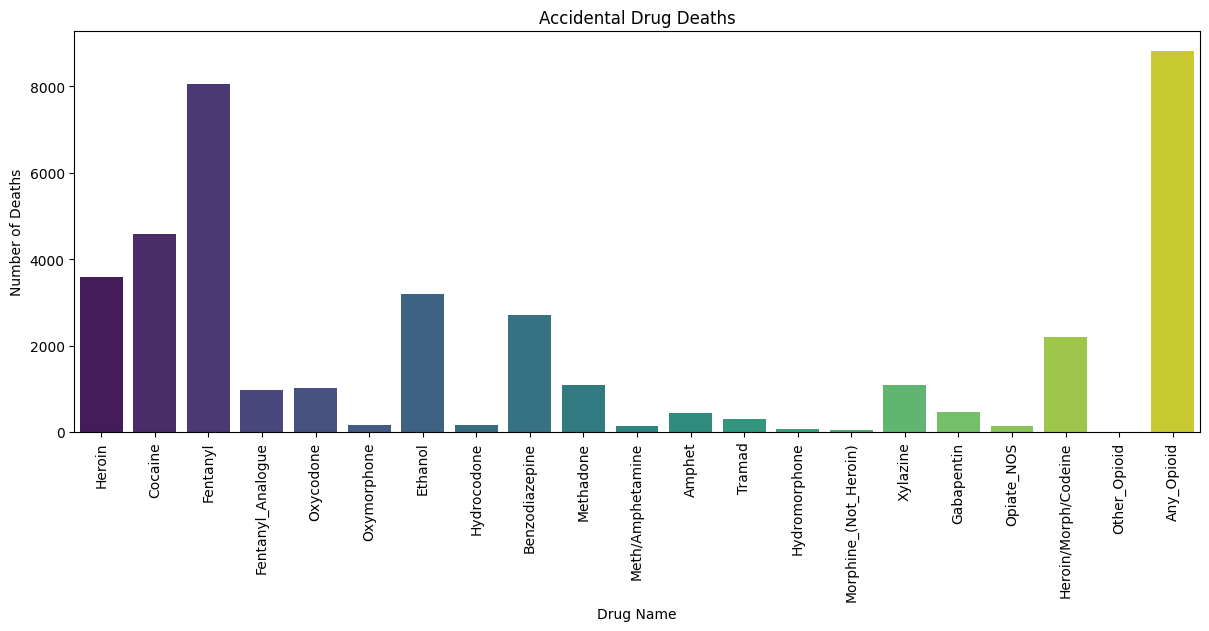

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))

sns.barplot(ax=ax, x=list(drug_counts.keys()), y=list(drug_counts.values()), palette='viridis')

ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

fig.tight_layout()

ax.set(xlabel='Drug Name', ylabel='Number of Deaths')
ax.set_title('Accidental Drug Deaths')

## Heatmap to visualize the correlation score between demographic data

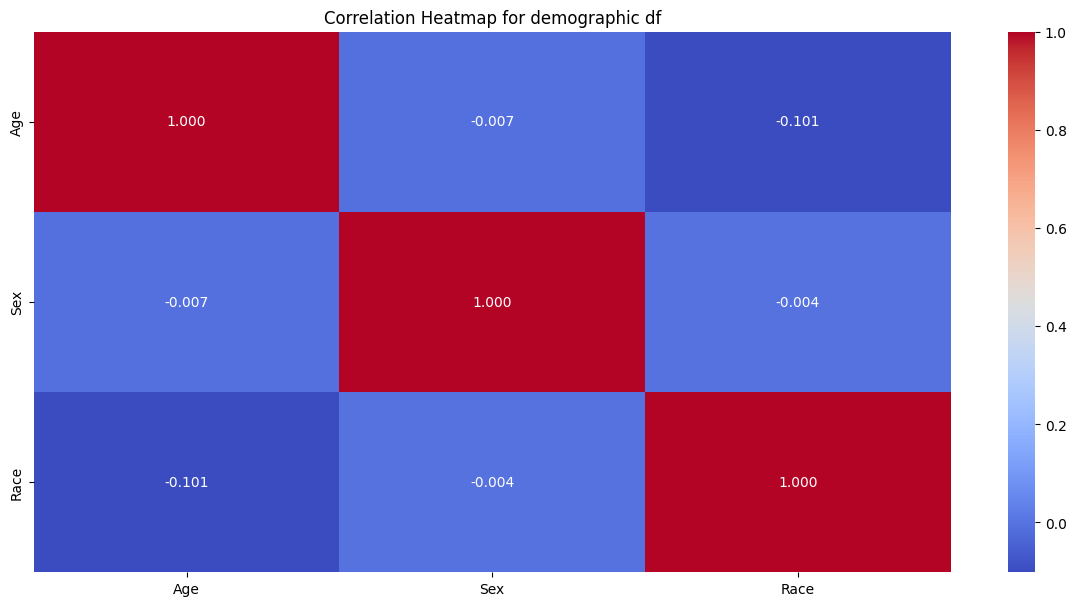

In [ ]:
corr = df_corr.corr()

fig, (axis1) = plt.subplots(figsize=(12, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', ax=axis1, fmt='.3f')
fig.tight_layout()
axis1.set_title("Correlation Heatmap for demographic df")
plt.show()

# Export DataSet

In [ ]:
from google.colab import files
df.to_csv('Accidental_Drug_Related_Deaths.csv')
files.download('Accidental_Drug_Related_Deaths.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>